# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 5

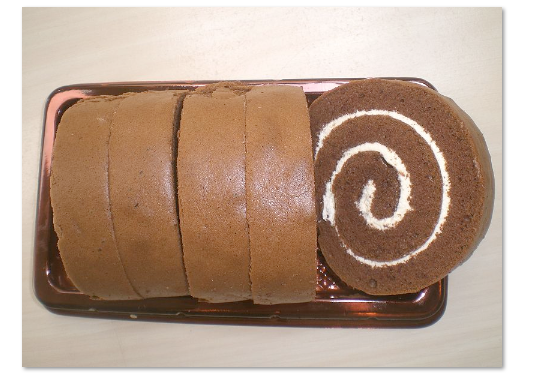


In this lab we will cover material from lecture 5. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 5' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 5. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 5' en teams. Je vous souhaite un beau laboratoire!

# Q1: Multidimensional Scaling (35pt)

In this question we will implement the multidimensional scaling algorithm. First of all let's create the data

# Q1 : Mise à l'échelle multidimensionnelle (35 pts)

Dans cette question, nous implémenterons l'algorithme de mise à l'échelle multidimensionnelle. Tout d'abord, créons les données

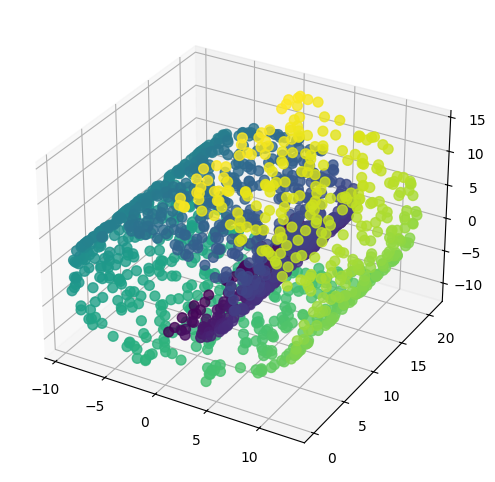

In [126]:
import sklearn.datasets as skd
import matplotlib.pyplot as plt


sr_points, sr_color = skd.make_swiss_roll(n_samples=1500, noise=0.00, random_state=2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)



## Q1a. Compute the Pairwise Distance Matrix (10pt)

Compute the pairwise distance matrix $d_{ij} = \| x_i - x_j \|_2^2$.

## Q1a. Calculer la matrice de distance par paire (10 pt)

Calculez la matrice de distance par paire $d_{ij} = \| x_i - x_j \|_2^2$.

In [127]:
import torch
X = torch.from_numpy(sr_points)
## travaillez ici
sum_X_square = torch.sum(X**2, dim=1, keepdim=True)

D = sum_X_square.unsqueeze(0) + sum_X_square.unsqueeze(1) - 2 * (X @ X.T)
D = D.float()
D


tensor([[  0.0000, 189.4307,  94.9714,  ..., 148.4472, 111.5205,  34.8551],
        [189.4307,   0.0000, 140.7964,  ..., 293.1772, 352.6755, 271.7917],
        [ 94.9714, 140.7964,   0.0000,  ..., 290.3954,  99.1528, 151.6590],
        ...,
        [148.4472, 293.1772, 290.3954,  ...,   0.0000, 166.6475,  58.1017],
        [111.5205, 352.6755,  99.1528,  ..., 166.6475,   0.0000,  64.8780],
        [ 34.8551, 271.7917, 151.6590,  ...,  58.1017,  64.8780,   0.0000]])

## Q1b. Centering and decomposition (10pt)

Make the $D$ matrix centered by multiplying it from both sides with $Z:= I_N - 1_N^\top 1_N / N$. That is, calculate $S:= -\frac{1}{2} Z D Z $. Then calculate the
eigenvalue decomposition of this matrix.

--------------------------------

## Q1b. Centrage et décomposition (10pt)

Centrez la matrice $D$ en la multipliant des deux côtés par $Z:= I_N - 1_N^\top 1_N / N$. Autrement dit, calculez $S:= -\frac{1}{2} Z D Z $. Calculez ensuite la décomposition des valeurs propres de cette matrice.


In [128]:
## travaillez ici

Z = torch.eye(D.size(0)).float() - torch.ones(D.size()).float()/D.shape[0]

S = -0.5 *(Z@D@Z) 
S

tensor([[114.3635,  10.4177,  81.0885,  ...,  13.0587,  81.8040,  84.7199],
        [ 10.4177,  95.9027,  48.9457,  ..., -68.5367, -48.0039, -42.9788],
        [ 81.0885,  48.9456, 142.7850,  ..., -43.7047, 102.1987,  40.5287],
        ...,
        [ 13.0587, -68.5368, -43.7047,  ...,  60.2011,  27.1594,  46.0154],
        [ 81.8040, -48.0039, 102.1986,  ...,  27.1594, 160.7651,  92.9093],
        [ 84.7199, -42.9788,  40.5287,  ...,  46.0154,  92.9093,  89.9314]])

## Q1c. Get the low-dim projection and plot it (10pt)

Set $\widehat X = V^{1/2}_k U_k^\top$, where $U_k$, and $V_k$ correspond to the top $k$ eigenvalues. Set $k =2$.

## Q1c. Obtenez la projection à bas dimensionnalité et tracez-la (10 pt)

Définissez $\widehat X = V^{1/2}_k U_k^\top$, où $U_k$ et $V_k$ correspondent aux principales valeurs propres $k$. Définissez $k =2$.



torch.Size([2, 1500])


c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


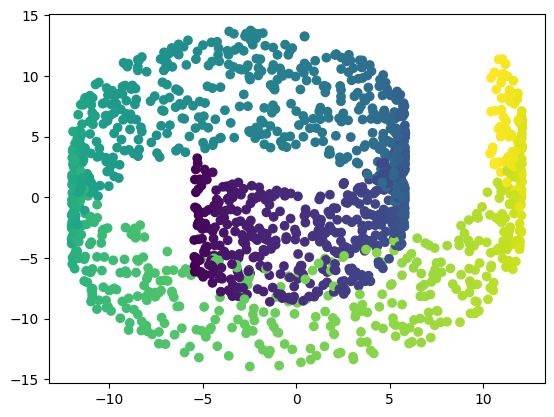

In [129]:
# travaillez ici!!
k=2
eigenvalues, eigenvectors = torch.linalg.eig(S)
sorted_indices = torch.argsort(torch.abs(eigenvalues), descending=True)

top_eigenvalues = eigenvalues[sorted_indices][:k]
top_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

Xhat = torch.diag(torch.sqrt(top_eigenvalues))@top_eigenvectors.T
print(Xhat.shape)
plt.scatter(Xhat[0, :], Xhat[1, :], c=sr_color)

## Q1d. Calculate distance matrix of the lower dimensional version and compare (5pt)

Calculate the distance matrix from the 2d data, and visually compare with the original distance matrix. Use the first 100 entries to compare

----------------------------

## Q1d. Calculer la matrice de distance de la version dimensionnelle inférieure et comparer (5 points)

Calculez la matrice de distance à partir des données 2D et comparez visuellement avec la matrice de distance d'origine. Utilisez les 100 premières entrées pour comparer


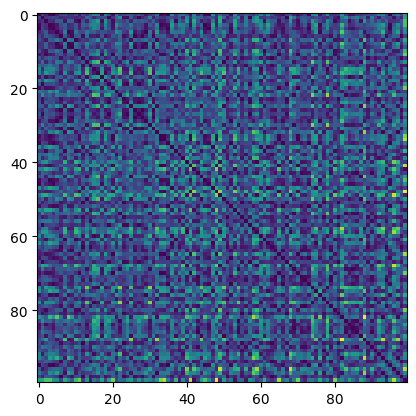

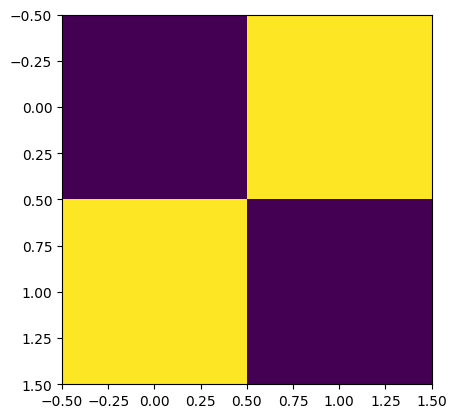

In [140]:
# travaillez ici


# sum_X_square = torch.sum(Xhat**2, dim=0)

# D2 = sum_X_square.unsqueeze(0) + sum_X_square.unsqueeze(1) - 2 * (X @ X.T)
# D2 = D2.float()

D2 = torch.cdist(Xhat.real, Xhat.real, p=2)

plt.figure()
plt.imshow(D[:100, :100])

plt.figure()
plt.imshow(D2[:100, :100])

# Q2 Unroll the swissroll with ISOMAP (40 pt)

Now we will incorporate geodesic distances to see if this helps in unrolling the swissroll.

---------------

# Q2 Déroulez le swissroll avec ISOMAP (40 pt)

Nous allons maintenant intégrer les distances géodésiques pour voir si cela aide à dérouler le swissroll


## Q2.a Calculate the distance metric with geodesic distances (10pt)

First of all calculate the distance matrix with geodesic distances.

For this first of all, you need to get the k-nearest neighbor graph. For this you can use `scipy.sparse.csgraph.kneighbors_graph`. You should use it in `mode='distance'`, and use `metric='euclidean'`. Set `n_neighbors` to a reasonable value.

Then we need to calculate the distance matrix that corresponds to the shortest paths between points. For this we can use `scipy.sparse.csgraph.shortest_path`. You should set `directed=False` (we will be working with an undirected graph), and `unweighted=False`, because we want to weight the edges according to the distance values.

After you get your geodesic distance matrix, do not forget to calculate the square as MDS requires the distance matrix to be squared, but the we define the neighborhoods with the euclidean distance.

Visualize at the end a 100x100 chunk of your distance matrix with `plt.imshow`.

------------------------------

## Q2.a Calculer la métrique de distance avec des distances géodésiques (10 pt)

Tout d’abord, calculez la matrice de distance avec les distances géodésiques.

Pour cela, vous devez tout d’abord obtenir le graphique du k voisin le plus proche. Pour cela, vous pouvez utiliser `scipy.sparse.csgraph.kneighbors_graph`. Vous devez l'utiliser en `mode='distance'` et utiliser `metric='euclidean'`. Définissez `n_neighbours` sur une valeur raisonnable.

Ensuite, nous devons calculer la matrice de distance qui correspond aux chemins les plus courts entre les points. Pour cela, nous pouvons utiliser `scipy.sparse.csgraph.shortest_path`. Vous devez définir `directed=False` (nous travaillerons avec un graphe non orienté) et `unweighted=False`, car nous voulons pondérer les arêtes en fonction des valeurs de distance.

Après avoir obtenu votre matrice de distance géodésique, n'oubliez pas de calculer le carré car MDS exige que la matrice de distance soit au carré, mais nous définissons les quartiers avec la distance euclidienne.

Visualisez à la fin un morceau de 100x100 de votre matrice de distance avec `plt.imshow`



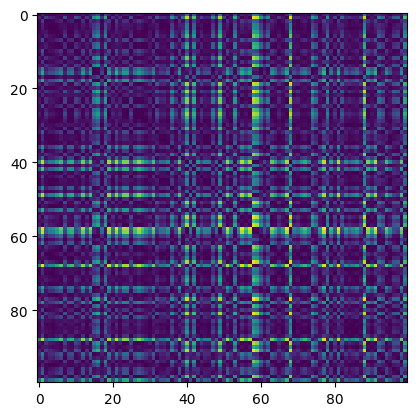

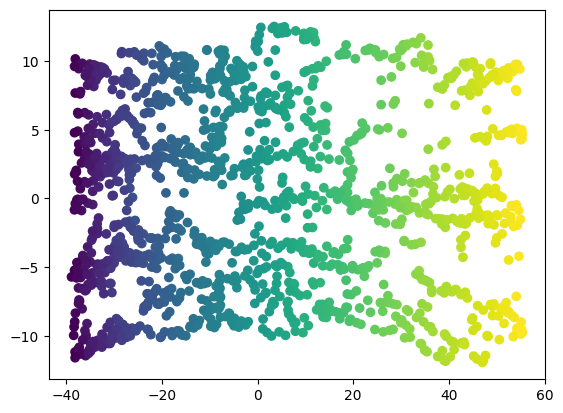

In [144]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import shortest_path

# travaillez ici

n_neighbors = 7  

knn_graph = kneighbors_graph(sr_points, n_neighbors=n_neighbors, mode='distance', metric='euclidean')

D_geo = shortest_path(knn_graph, directed=False, unweighted=False)


D_geo = torch.from_numpy(D_geo).float()
D_geo = D_geo ** 2
plt.imshow(D_geo[:100, :100])


# if you want to check what sklearn gives
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=7)

pts = isomap.fit_transform(sr_points)

plt.figure()
plt.scatter(pts[:, 0], pts[:, 1], c=sr_color)



## Q2.b Unroll with MDS! (15pt)

Now simply input the geodesic distance matrix into Multi-dimensional scaling algorithm we have implemented before, and plot the result. Use `plt.scatter(Xhat[0, :], Xhat[1, :], c=sr_color)` to plot the projection.

-------------------------

## Q2.b Déroulez avec MDS ! (15pts)

Maintenant, entrez simplement la matrice de distance géodésique dans l'algorithme de mise à l'échelle multidimensionnelle que nous avons implémenté auparavant et tracez le résultat. Utilisez `plt.scatter(Xhat[0, :], Xhat[1, :], c=sr_color)` pour tracer la projection


c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


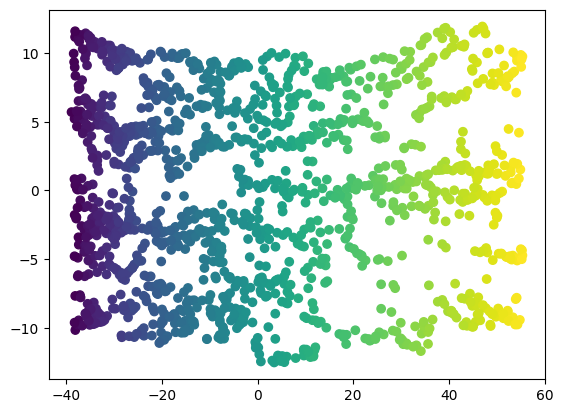

In [147]:
#MDS on D_geo

# travaillez ici
Z = torch.eye(D_geo.size(0)).float() - torch.ones(D_geo.size()).float()/D_geo.shape[0]

S = -0.5 *(Z@D_geo@Z) 

k=2
eigenvalues, eigenvectors = torch.linalg.eig(S)
sorted_indices = torch.argsort(torch.abs(eigenvalues), descending=True)

top_eigenvalues = eigenvalues[sorted_indices][:k]
top_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

Xhat = torch.diag(torch.sqrt(top_eigenvalues))@top_eigenvectors.T

plt.figure()
plt.scatter(Xhat[0, :], Xhat[1, :], c=sr_color)


## Q2.c The neighborhood effect! (15pt)

Now, implement an ISOMAP function such that the API is `ISOMAP(x, n_neighbors)`, where `x` is the input data and the second argument is the number of neighbors to consider. Obtain results for `n_neighbors= 4, 7, 10, 20, 50, 200, 1499`. Plot all the results, and comment on what is the effect of number of neighbors.

------------------------------------

## Q2.c L'effet du voisinage ! (15pts)

(Notez la belle traduction du titre)

Maintenant, implémentez une fonction ISOMAP telle que l'API soit « ISOMAP(x, n_neighbors) », où « x » est les données d'entrée et le deuxième argument est le nombre de voisins à prendre en compte. Obtenez les résultats pour `n_neighbours= 4, 7, 10, 20, 50, 200, 1499`. Tracez tous les résultats et commentez quel est l'effet du nombre de voisins


c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to r

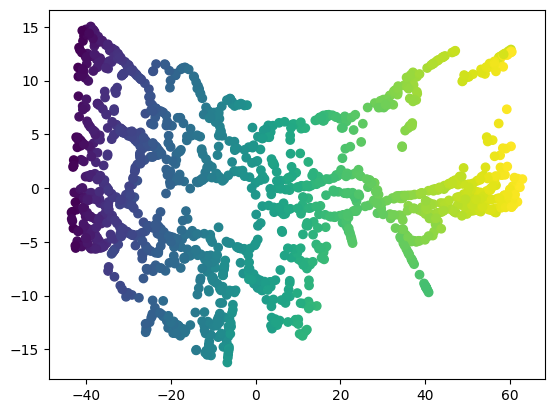

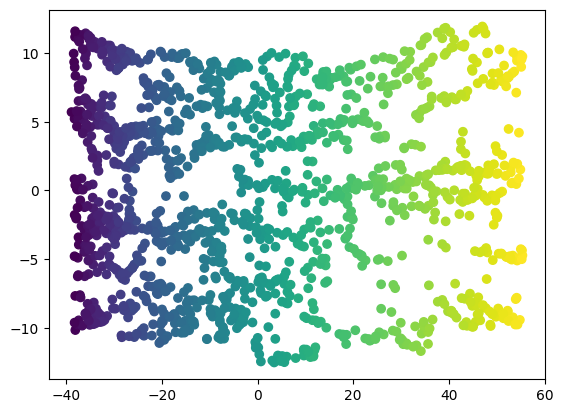

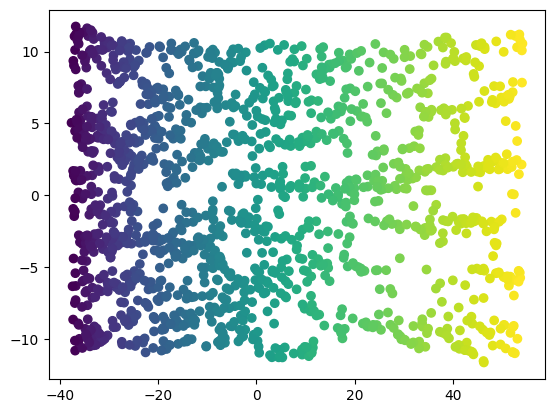

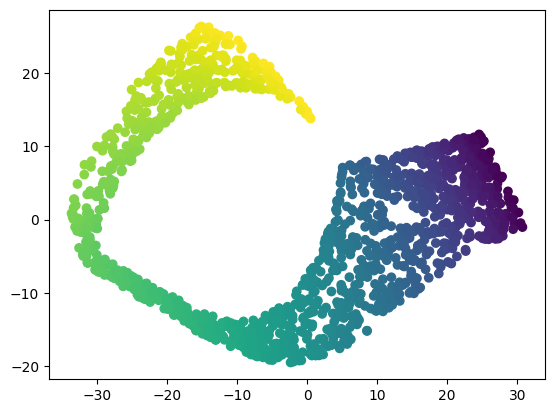

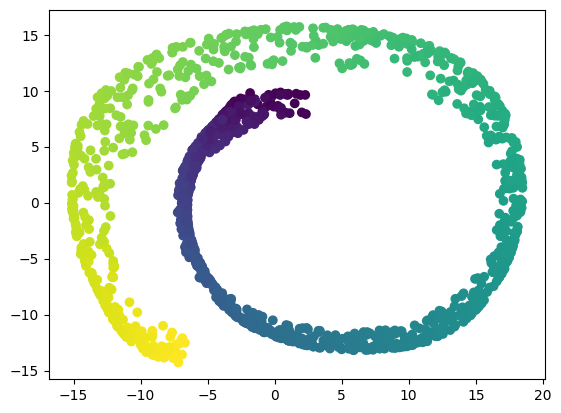

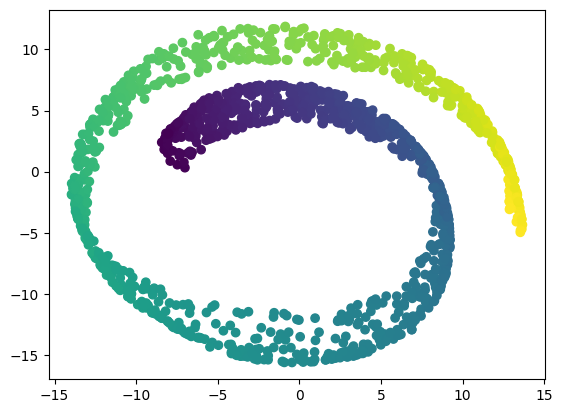

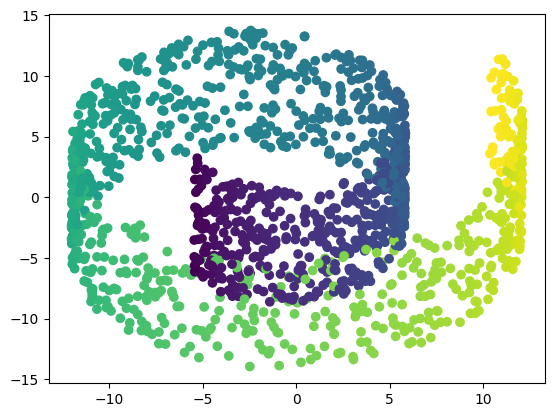

In [150]:
def ISOMAP(sr_points, n_neighbors=10, k=2):
  #### travaillez ici
  knn_graph = kneighbors_graph(sr_points, n_neighbors=n_neighbors, mode='distance', metric='euclidean')

  D_geo = shortest_path(knn_graph, directed=False, unweighted=False)
  D_geo = torch.from_numpy(D_geo).float()
  D_geo = D_geo ** 2
  Z = torch.eye(D_geo.size(0)).float() - torch.ones(D_geo.size()).float()/D_geo.shape[0]

  S = -0.5 *(Z@D_geo@Z) 
  
  eigenvalues, eigenvectors = torch.linalg.eig(S)
  sorted_indices = torch.argsort(torch.abs(eigenvalues), descending=True)

  top_eigenvalues = eigenvalues[sorted_indices][:k]
  top_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

  Xhat = torch.diag(torch.sqrt(top_eigenvalues))@top_eigenvectors.T
  
  return Xhat, D_geo

xhat, D_geo = ISOMAP(sr_points, n_neighbors=4)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)

xhat, D_geo = ISOMAP(sr_points, n_neighbors=7)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)

xhat, D_geo = ISOMAP(sr_points, n_neighbors=10)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)

xhat, D_geo = ISOMAP(sr_points, n_neighbors=20)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)

xhat, D_geo = ISOMAP(sr_points, n_neighbors=50)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)

xhat, D_geo = ISOMAP(sr_points, n_neighbors=200)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)

xhat, D_geo = ISOMAP(sr_points, n_neighbors=1499)
plt.figure()
plt.scatter(xhat[0, :], xhat[1, :], c=sr_color)



Write your interpretation here: / Ajoutez votre interpretation ici:


.

# Q3 Implement Kernel PCA (25 pt)

In this question we ask you to implement Kernel PCA. Use an RBF kernel $k(x, y) = \exp(-\gamma \| x-y\|_2^2)$. Again use the swiss roll data `sr_points`.

## Q3.a Calculate the Kernel and it's eigenvalues. (15pt)

You can use the $D$ matrix from above to get the kernel matrix $K$. But then don't forget to center the kernel matrix $K$ by doing $Z K Z$. (Use the same $Z$ as the first question)

The projection to the 2D space is simply given by the first two eigenvectors. (Row n of the first two columns of the matrix $B = U V^{-1/2}$ will be the projection for the data item $N$, just like MDS). Plot the projection for $\gamma$ = 0.04.


--------------

# Q3 Implémenter la PCA du noyau (25 pt)

Dans cette question, nous vous demandons d'implémenter Kernel PCA. Utilisez un noyau RBF $k(x, y) = \exp(-\gamma \| x-y\|_2^2)$. Utilisez à nouveau les données du Swiss Roll `sr_points`.

## Q3.a Calculez le noyau et ses valeurs propres. (15pt)

Vous pouvez utiliser la matrice $D$ ci-dessus pour obtenir la matrice du noyau $K$. Mais n'oubliez pas de centrer la matrice du noyau $K$ en faisant $Z K Z$. (Utilisez le même $Z$ que la première question)

La projection dans l'espace 2D est simplement donnée par les deux premiers vecteurs propres. (La ligne n des deux premières colonnes de la matrice $B = U V^{-1/2}$ sera la projection de l'élément de données $N$, tout comme MDS). Tracez la projection pour $\gamma$ = 0,04.


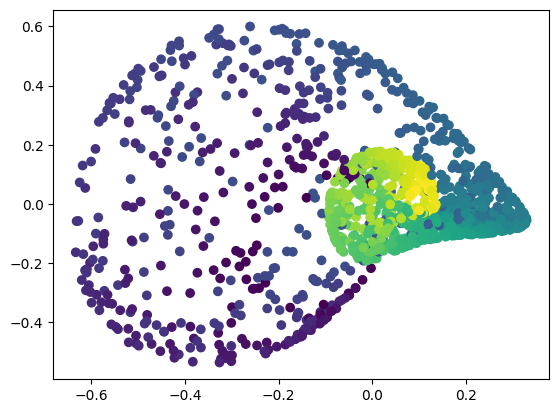

In [152]:
def kpca(D, gamma):
  # travaillez ici
  K = torch.exp(-gamma * D)
  
  K_centered = Z @ K @ Z

  eigenvalues, eigenvectors = torch.linalg.eig(K_centered)
  sorted_indices = torch.argsort(torch.abs(eigenvalues), descending=True)

  top_eigenvalues = eigenvalues[sorted_indices][:2]
  top_eigenvectors = eigenvectors[:, sorted_indices][:, :2]

  xhat_kpca = top_eigenvectors @ torch.diag(torch.sqrt(top_eigenvalues))

  return xhat_kpca

xhat_kpca = kpca(D, 0.04)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)




## Q3.b Neighborhood effect of gamma (10pt)

Try different values of gamma, such that $\gamma = 1, 0.1, 0.02, 0.01, 0.001, 0.0001$, and comment on the results. Any similarities to the number of neighbors we have seen for the ISOMAP method?  

-----------------------------

## Q3.b Effet de voisinage du gamma (10pt)

Essayez différentes valeurs de gamma, telles que $\gamma = 1, 0,1, 0,02, 0,01, 0,001, 0,0001$, et commentez les résultats. Y a-t-il des similitudes avec le nombre de voisins que nous avons observés pour la méthode ISOMAP ?

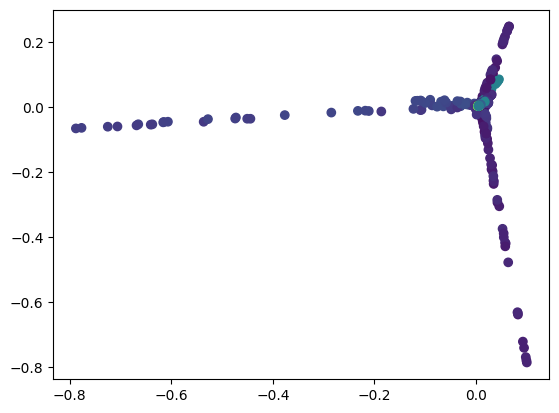

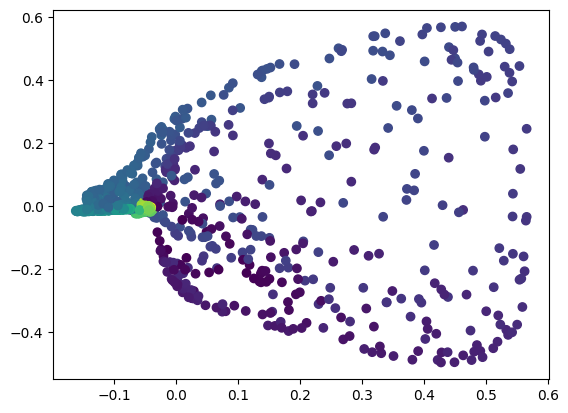

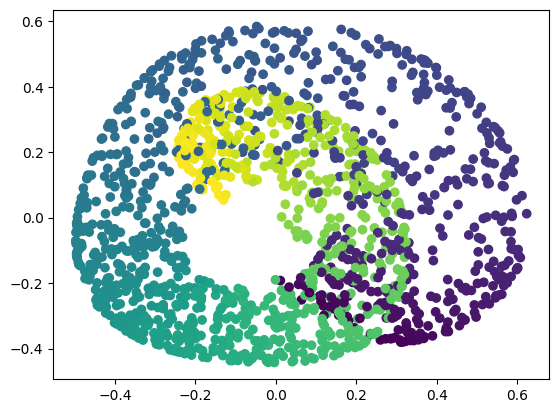

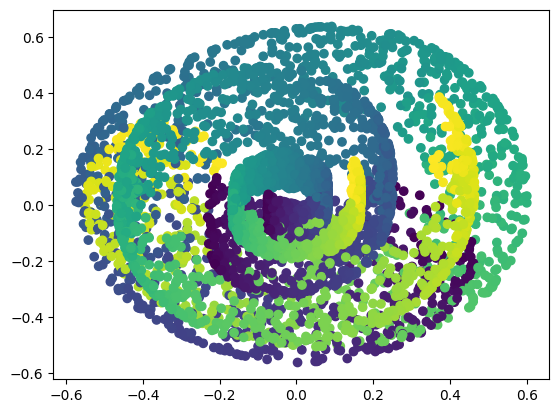

In [153]:

plt.figure()
xhat_kpca = kpca(D, 1)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)

plt.figure()
xhat_kpca = kpca(D, 0.1)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)

plt.figure()
xhat_kpca = kpca(D, 0.02)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)

plt.figure()
xhat_kpca = kpca(D, 0.01)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)

xhat_kpca = kpca(D, 0.001)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)

xhat_kpca = kpca(D, 0.0001)
plt.scatter(xhat_kpca[:, 0], xhat_kpca[:, 1], c=sr_color)




Add you interpretation here / Ajoutez votre interprétation ici:

